In [1]:
import cv2 as cv
import glob 
import os
import tensorflow as tf
import numpy as np
import albumentations as alb
import matplotlib.pyplot as plt

# PKM AI
> Pkm pemanfaatan algoritma cnn untuk klasifikasi kematangan buah pisang berdasar warna kulit

In [2]:
data_pisang=tf.keras.utils.image_dataset_from_directory('data_gambar',image_size=(256,256))

Found 3048 files belonging to 2 classes.


In [4]:
classes=data_pisang.class_names

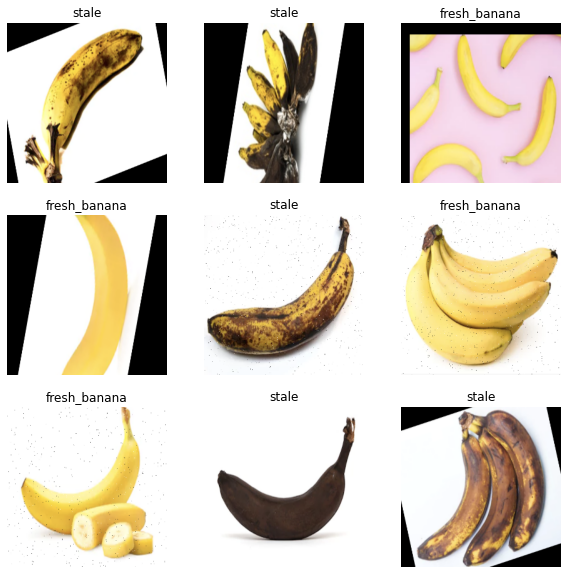

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in data_pisang.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")

Dapat dilihat bahwa :
* 1 Pisang stale 
* 0 Pisang fresh

In [15]:
fresh_images=[] #Load data pisang fresh
for dir in glob.glob('data_gambar/fresh_banana'):
    for image in glob.glob(os.path.join(dir,"*png")):
        img=cv.imread(image)
        fresh_images.append(img)

In [25]:
stale_images=[] #Load data pisang stale
for dir in glob.glob('data_gambar/stale'):
    for image in glob.glob(os.path.join(dir,"*png")):
        img=cv.imread(image)
        stale_images.append(img)

In [26]:
plot_fresh_images=np.array(fresh_images)
plot_stale_images=np.array(stale_images)


C:\Users\Reza\AppData\Local\Temp/ipykernel_21660/158089045.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_fresh_images=np.array(fresh_images)
C:\Users\Reza\AppData\Local\Temp/ipykernel_21660/158089045.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_stale_images=np.array(stale_images)


Visual data gambar

In [27]:
def load_images(images):
    # Tampilkan Gambar
    fig = plt.figure(figsize=(15,15))
    for i in range(5):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.title("Image data")
        plt.grid(False)
        plt.imshow(images[i],cmap=plt.cm.binary)
    plt.show()

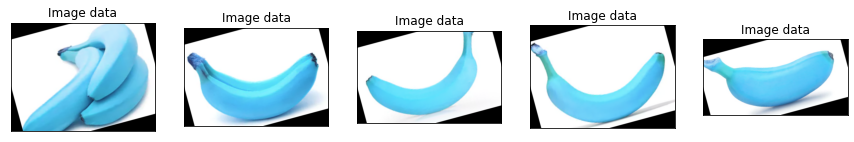

In [28]:
load_images(plot_fresh_images)

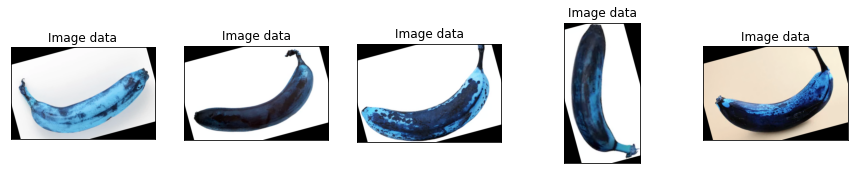

In [29]:
load_images(plot_stale_images)

In [31]:
print(f"Total gambar pisang fresh -> {len(fresh_images)}")
print(f"Total gambar pisang stale -> {len(stale_images)}")

Total gambar pisang fresh -> 1581
Total gambar pisang stale -> 1467


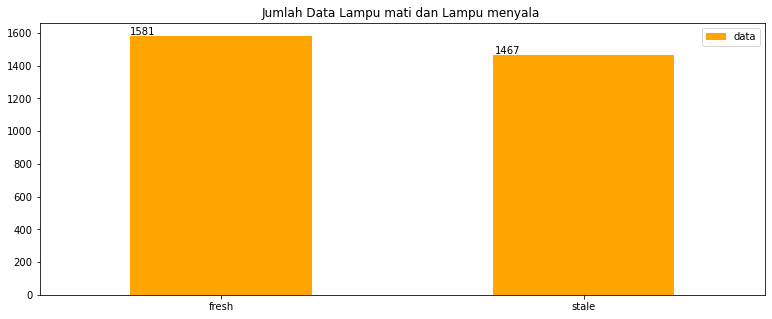

In [32]:
import pandas as pd

# visualisasi jumlah data training dan data validation
data= [len(fresh_images),len(stale_images)]

index = ['fresh','stale']
data_am = pd.DataFrame({'data': data}, index=index)
ax = data_am.plot.bar(rot=0, color=['orange'], figsize=(13,5))
ax.set_title("Jumlah Data Lampu mati dan Lampu menyala ")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.savefig("Data_pinsag_chart.png")


## Split data 
- data train 
- data test
- data validation

Dengan rasio
- data train        0.8
- data test         0.1     
- data validation   0.1

In [47]:
print(f'Data train untuk fresh banana : {int(1581*0.8)}') 
print(f'Data val untuk fresh banana : {int(1581*0.1)}') 
print(f'Data test untuk fresh banana : {int(1581*0.1)}') 

Data train untuk fresh banana : 1264
Data val untuk fresh banana : 158
Data test untuk fresh banana : 158


In [50]:
print(f'Data train untuk stale banana : {int(1467*0.8)}') 
print(f'Data test untuk stale banana : {int(1467*0.1)}') 
print(f'Data val untuk stale banana : {int(1467*0.1)}') 

Data train untuk stale banana : 1173
Data test untuk stale banana : 146
Data val untuk stale banana : 146


Dilakukan secara manual

In [63]:
train_images=[] #Load data train
for dir in glob.glob('data_gambar_siap_model/train/*'):
    for image in glob.glob(os.path.join(dir,"*png")):
        img=cv.imread(image)
        train_images.append(img)

In [64]:
test_images=[] #Load data test
for dir in glob.glob('data_gambar_siap_model/test/*'):
    for image in glob.glob(os.path.join(dir,"*png")):
        img=cv.imread(image)
        test_images.append(img)

In [65]:
val_images=[] #Load data val
for dir in glob.glob('data_gambar_siap_model/val/*'):
    for image in glob.glob(os.path.join(dir,"*png")):
        img=cv.imread(image)
        val_images.append(img)

In [66]:
print(f"Total gambar train -> {len(train_images)}")
print(f"Total gambar test -> {len(test_images)}")
print(f"Total gambar val -> {len(val_images)}")

Total gambar train -> 2437
Total gambar test -> 304
Total gambar val -> 304


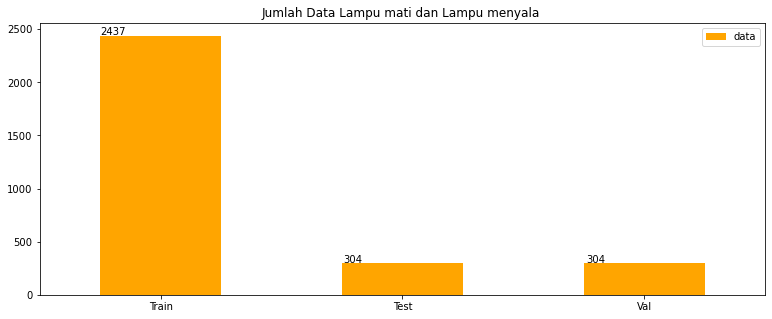

In [67]:
import pandas as pd

# visualisasi jumlah data training dan data validation
data= [len(train_images),len(test_images),len(val_images)]

index = ['Train','Test','Val']
data_am = pd.DataFrame({'data': data}, index=index)
ax = data_am.plot.bar(rot=0, color=['orange'], figsize=(13,5))
ax.set_title("Jumlah Data Lampu mati dan Lampu menyala ")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.savefig("Data_banana_train_test_val.png")


#### Split data untuk dilakukan train menggunakan CNN

In [123]:
data_train=tf.keras.utils.image_dataset_from_directory(
'data_gambar_siap_model/train',
image_size=(256,256),
label_mode="binary",
batch_size=5,
seed=100
)

data_test=tf.keras.utils.image_dataset_from_directory(
'data_gambar_siap_model/test',
image_size=(256,256),
label_mode="binary",
batch_size=5,
seed=100
)

data_val=tf.keras.utils.image_dataset_from_directory(
'data_gambar_siap_model/val',
image_size=(256,256),
label_mode="binary",
batch_size=5,
seed=100
)

Found 2437 files belonging to 2 classes.
Found 304 files belonging to 2 classes.
Found 304 files belonging to 2 classes.


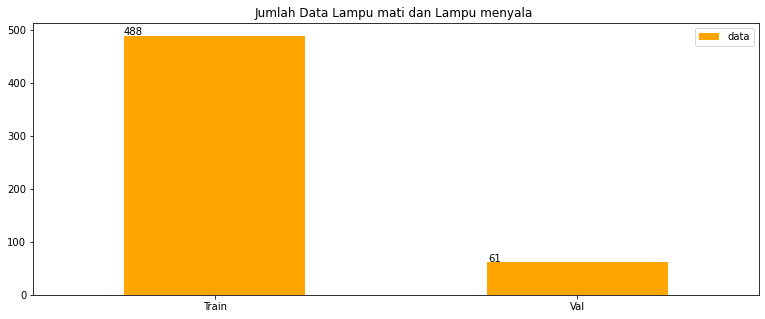

In [71]:
import pandas as pd

# visualisasi jumlah data training dan data validation
data= [len(data_train),len(data_val)]

index = ['Train','Val']
data_am = pd.DataFrame({'data': data}, index=index)
ax = data_am.plot.bar(rot=0, color=['orange'], figsize=(13,5))
ax.set_title("Jumlah Data Lampu mati dan Lampu menyala ")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.savefig("Data_CNN_pinsa_train__val.png")


In [72]:
class_train=data_train.class_names
print(class_train)

['fresh', 'stale']


### Create model cnn

In [110]:
model_cnn_1_konvolusi_layer = tf.keras.models.Sequential([
tf.keras.layers.Rescaling(1./255,input_shape=(256,256,3)),

# layar konvolusi pertama
tf.keras.layers.Conv2D(filters=16,
                        kernel_size=3,
                        activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=2),




#Lakukan Flatten
tf.keras.layers.Flatten(),

#Lakukan Fully connected layer
tf.keras.layers.Dense(1, activation='sigmoid')
   
])
model_cnn_1_konvolusi_layer.compile(
                optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
history_1_konvolusi=model_cnn_1_konvolusi_layer.fit(
               data_train,
                steps_per_epoch=15,
                epochs=15,
                validation_data=data_val,
                 validation_steps=15 ) 
            

Epoch 1/15
15/15 [==============================] - 2s 100ms/step - loss: 2.3636 - accuracy: 0.4800 - val_loss: 0.9372 - val_accuracy: 0.4933
Epoch 2/15
15/15 [==============================] - 1s 90ms/step - loss: 0.6365 - accuracy: 0.6667 - val_loss: 0.7487 - val_accuracy: 0.5333
Epoch 3/15
15/15 [==============================] - 1s 88ms/step - loss: 0.3940 - accuracy: 0.8267 - val_loss: 0.3279 - val_accuracy: 0.9067
Epoch 4/15
15/15 [==============================] - 1s 88ms/step - loss: 0.1943 - accuracy: 0.9467 - val_loss: 0.1744 - val_accuracy: 0.9600
Epoch 5/15
15/15 [==============================] - 1s 89ms/step - loss: 0.1481 - accuracy: 0.9600 - val_loss: 0.0805 - val_accuracy: 0.9733
Epoch 6/15
15/15 [==============================] - 1s 87ms/step - loss: 0.0882 - accuracy: 0.9733 - val_loss: 0.1804 - val_accuracy: 0.9333
Epoch 7/15
15/15 [==============================] - 1s 88ms/step - loss: 0.1458 - accuracy: 0.9467 - val_loss: 0.0804 - val_accuracy: 0.9867
Epoch 8/15
1

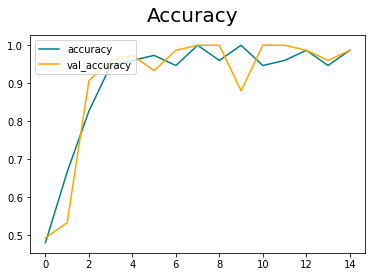

In [111]:
fig = plt.figure()
plt.plot(history_1_konvolusi.history['accuracy'], color='teal', label='accuracy')
plt.plot(history_1_konvolusi.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.savefig("acc_And_vaAcc_1Konvolusi.png")
plt.show()

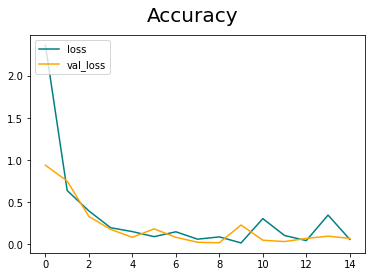

In [112]:
fig = plt.figure()
plt.plot(history_1_konvolusi.history['loss'], color='teal', label='loss')
plt.plot(history_1_konvolusi.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.savefig("acc_And_vaAcc_1Konvolusi_loss.png")
plt.show()

In [114]:
model_cnn_2_konvolusi_layer = tf.keras.models.Sequential([
tf.keras.layers.Rescaling(1./255,input_shape=(256,256,3)),

# layar konvolusi pertama
tf.keras.layers.Conv2D(filters=16,
                        kernel_size=3,
                        activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Layar Konvolusi Kedua
tf.keras.layers.Conv2D(32, 3, activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),


#Lakukan Flatten
tf.keras.layers.Flatten(),

#Lakukan Fully connected layer
tf.keras.layers.Dense(1, activation='sigmoid')
   
])
model_cnn_2_konvolusi_layer.compile(
                optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
history_2_konvolusi=model_cnn_2_konvolusi_layer.fit(
               data_train,
                steps_per_epoch=15,
                epochs=15,
                validation_data=data_val,
                 validation_steps=15 ) 
            

Epoch 1/15
15/15 [==============================] - 3s 152ms/step - loss: 0.9688 - accuracy: 0.5333 - val_loss: 0.4852 - val_accuracy: 0.8133
Epoch 2/15
15/15 [==============================] - 2s 149ms/step - loss: 0.4649 - accuracy: 0.8133 - val_loss: 0.4417 - val_accuracy: 0.8667
Epoch 3/15
15/15 [==============================] - 2s 131ms/step - loss: 0.2081 - accuracy: 0.9200 - val_loss: 0.1145 - val_accuracy: 1.0000
Epoch 4/15
15/15 [==============================] - 2s 130ms/step - loss: 0.1730 - accuracy: 0.9333 - val_loss: 0.1098 - val_accuracy: 0.9600
Epoch 5/15
15/15 [==============================] - 2s 132ms/step - loss: 0.1309 - accuracy: 0.9600 - val_loss: 0.1025 - val_accuracy: 0.9733
Epoch 6/15
15/15 [==============================] - 2s 126ms/step - loss: 0.1363 - accuracy: 0.9600 - val_loss: 0.7170 - val_accuracy: 0.6667
Epoch 7/15
15/15 [==============================] - 2s 127ms/step - loss: 0.1289 - accuracy: 0.9467 - val_loss: 0.3250 - val_accuracy: 0.8400
Epoch 

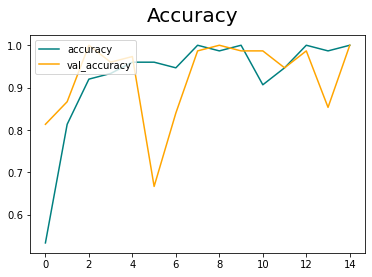

In [115]:
fig = plt.figure()
plt.plot(history_2_konvolusi.history['accuracy'], color='teal', label='accuracy')
plt.plot(history_2_konvolusi.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.savefig("acc_And_vaAcc_2Konvolusi.png")
plt.show()

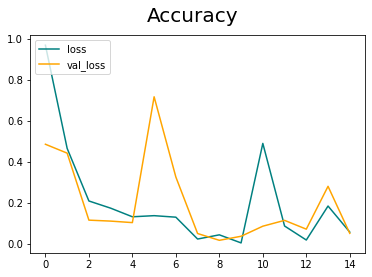

In [116]:
fig = plt.figure()
plt.plot(history_2_konvolusi.history['loss'], color='teal', label='loss')
plt.plot(history_2_konvolusi.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.savefig("acc_And_vaAcc_2Konvolusi_loss.png")
plt.show()

In [118]:
model_cnn_3_konvolusi_layer = tf.keras.models.Sequential([
tf.keras.layers.Rescaling(1./255,input_shape=(256,256,3)),

# layar konvolusi pertama
tf.keras.layers.Conv2D(filters=16,
                        kernel_size=3,
                        activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Layar Konvolusi Kedua
tf.keras.layers.Conv2D(32, 3, activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Layar Konvolusi Ketiga
tf.keras.layers.Conv2D(32, 3, activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Lakukan Flatten
tf.keras.layers.Flatten(),

#Lakukan Fully connected layer
tf.keras.layers.Dense(1, activation='sigmoid')
   
])
model_cnn_3_konvolusi_layer.compile(
                optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
history_3_konvolusi=model_cnn_3_konvolusi_layer.fit(
               data_train,
                steps_per_epoch=15,
                epochs=15,
                validation_data=data_val, 
                validation_steps=15, 
                )                

Epoch 1/15
15/15 [==============================] - 3s 161ms/step - loss: 0.8832 - accuracy: 0.4800 - val_loss: 0.7055 - val_accuracy: 0.4667
Epoch 2/15
15/15 [==============================] - 2s 145ms/step - loss: 0.6741 - accuracy: 0.5600 - val_loss: 0.6849 - val_accuracy: 0.4800
Epoch 3/15
15/15 [==============================] - 2s 147ms/step - loss: 0.5306 - accuracy: 0.8267 - val_loss: 0.4353 - val_accuracy: 0.7733
Epoch 4/15
15/15 [==============================] - 2s 146ms/step - loss: 0.5327 - accuracy: 0.7467 - val_loss: 0.4923 - val_accuracy: 0.7733
Epoch 5/15
15/15 [==============================] - 2s 150ms/step - loss: 0.2417 - accuracy: 0.9333 - val_loss: 0.1525 - val_accuracy: 1.0000
Epoch 6/15
15/15 [==============================] - 2s 145ms/step - loss: 0.3129 - accuracy: 0.8933 - val_loss: 0.1430 - val_accuracy: 0.9600
Epoch 7/15
15/15 [==============================] - 2s 146ms/step - loss: 0.1241 - accuracy: 0.9600 - val_loss: 0.0746 - val_accuracy: 0.9867
Epoch 

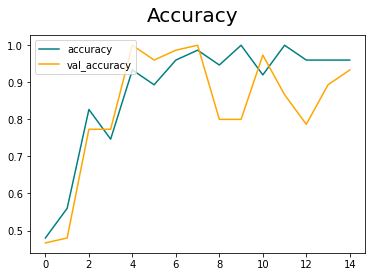

In [119]:
fig = plt.figure()
plt.plot(history_3_konvolusi.history['accuracy'], color='teal', label='accuracy')
plt.plot(history_3_konvolusi.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.savefig("acc_And_vaAcc_3Konvolusi.png")
plt.show()

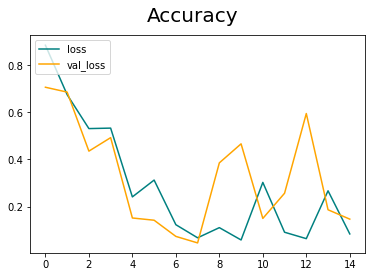

In [120]:
fig = plt.figure()
plt.plot(history_3_konvolusi.history['loss'], color='teal', label='loss')
plt.plot(history_3_konvolusi.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.savefig("acc_And_vaAcc_3Konvolusi_loss.png")
plt.show()

In [124]:
model_cnn_4_konvolusi_layer = tf.keras.models.Sequential([
tf.keras.layers.Rescaling(1./255,input_shape=(256,256,3)),

# layar konvolusi pertama
tf.keras.layers.Conv2D(filters=16,
                        kernel_size=3,
                        activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Layar Konvolusi Kedua
tf.keras.layers.Conv2D(32, 3, activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Layar Konvolusi Ketiga
tf.keras.layers.Conv2D(32, 3, activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Layar Konvolusi Keempat
tf.keras.layers.Conv2D(32, 3, activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),




#Lakukan Flatten
tf.keras.layers.Flatten(),

#Lakukan Fully connected layer
tf.keras.layers.Dense(1, activation='sigmoid')
   
])

model_cnn_4_konvolusi_layer.compile(
                optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
                
history_4_konvolusi=model_cnn_4_konvolusi_layer.fit(
               data_train,
                steps_per_epoch=15,
                epochs=15,
                validation_data=data_val, 
                validation_steps=15, 
                )          
                

Epoch 1/15
15/15 [==============================] - 3s 164ms/step - loss: 0.6404 - accuracy: 0.6133 - val_loss: 0.5907 - val_accuracy: 0.8267
Epoch 2/15
15/15 [==============================] - 2s 154ms/step - loss: 0.4840 - accuracy: 0.8133 - val_loss: 0.2620 - val_accuracy: 0.9067
Epoch 3/15
15/15 [==============================] - 2s 155ms/step - loss: 0.4191 - accuracy: 0.8400 - val_loss: 0.2417 - val_accuracy: 0.9467
Epoch 4/15
15/15 [==============================] - 2s 154ms/step - loss: 0.2841 - accuracy: 0.9067 - val_loss: 0.1990 - val_accuracy: 0.9333
Epoch 5/15
15/15 [==============================] - 2s 151ms/step - loss: 0.3313 - accuracy: 0.8667 - val_loss: 0.1950 - val_accuracy: 0.9600
Epoch 6/15
15/15 [==============================] - 2s 147ms/step - loss: 0.3342 - accuracy: 0.9067 - val_loss: 0.1898 - val_accuracy: 0.9600
Epoch 7/15
15/15 [==============================] - 2s 147ms/step - loss: 0.1410 - accuracy: 0.9733 - val_loss: 0.2568 - val_accuracy: 0.9200
Epoch 

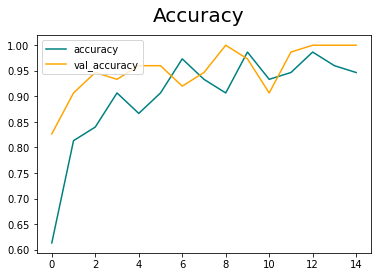

In [125]:
fig = plt.figure()
plt.plot(history_4_konvolusi.history['accuracy'], color='teal', label='accuracy')
plt.plot(history_4_konvolusi.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.savefig("acc_And_vaAcc_4Konvolusi.png")
plt.show()

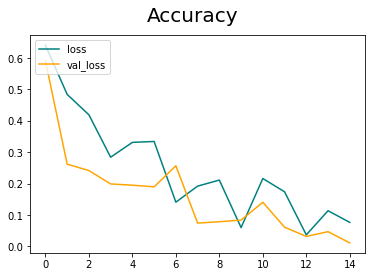

In [126]:
fig = plt.figure()
plt.plot(history_4_konvolusi.history['loss'], color='teal', label='loss')
plt.plot(history_4_konvolusi.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.savefig("acc_And_vaAcc_4Konvolusi_loss.png")
plt.show()

## prediksi

## save model

In [128]:
model_cnn_1_konvolusi_layer.save(os.path.join('model','imageclassifier_pisang_1Conv.h5'))
model_cnn_2_konvolusi_layer.save(os.path.join('model','imageclassifier_pisang_2Conv.h5'))
model_cnn_3_konvolusi_layer.save(os.path.join('model','imageclassifier_pisang_3Conv.h5'))
model_cnn_4_konvolusi_layer.save(os.path.join('model','imageclassifier_pisang_4Conv.h5'))

In [129]:
from tensorflow.keras.utils import load_img

In [130]:
load_model_1Conv=tf.keras.models.load_model('model/imageclassifier_pisang_1Conv.h5')
predict_1Conv_model=load_model_1Conv.predict(data_test)
print(predict_1Conv_model)

61/61 [==============================] - 2s 23ms/step
[[9.97231364e-01]
 [9.30130780e-01]
 [2.19787308e-03]
 [9.93229210e-01]
 [9.58468735e-01]
 [4.36871313e-04]
 [3.57983308e-03]
 [9.86511767e-01]
 [2.62084790e-02]
 [9.98454630e-01]
 [9.71277952e-01]
 [3.60490978e-01]
 [4.75704001e-04]
 [8.73474579e-04]
 [9.98776019e-01]
 [7.61290610e-01]
 [2.93349456e-02]
 [5.01555484e-03]
 [9.95773017e-01]
 [9.43312228e-01]
 [2.59500816e-02]
 [9.85153913e-01]
 [9.84261572e-01]
 [8.28177785e-04]
 [9.93339479e-01]
 [9.39985178e-03]
 [9.67761397e-01]
 [9.47583735e-01]
 [7.10484665e-03]
 [2.24629370e-03]
 [8.41952801e-01]
 [9.99002516e-01]
 [9.94527042e-01]
 [9.40723717e-01]
 [9.98053670e-01]
 [6.49111152e-01]
 [9.85213578e-01]
 [8.04290920e-03]
 [9.30686891e-01]
 [6.34228112e-03]
 [9.99330461e-01]
 [9.18363337e-04]
 [9.95141923e-01]
 [5.31621426e-02]
 [5.23098826e-01]
 [3.98247242e-02]
 [9.51194704e-01]
 [2.26924852e-01]
 [9.98848677e-01]
 [6.54410198e-03]
 [9.58661854e-01]
 [9.48215306e-01]
 [9.971221

In [379]:
# class_names = {
#     0:"Lampu menyala",
#     1:"Lampu mati"
# }
# type(class_names)

dict

In [133]:
test_label=data_test.class_names
test_label

['fresh', 'stale']

In [134]:
def listToDict(lst):
    op = { i : lst[i] for i in range(0, len(lst) ) }
    return op
class_names=listToDict(test_label)
print(listToDict(class_names))

{0: 'fresh', 1: 'stale'}


1/1 [==============================] - 0s 38ms/step


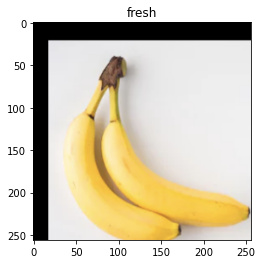

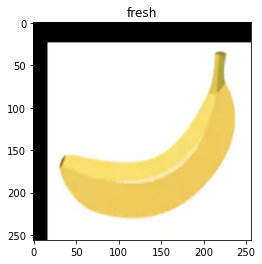

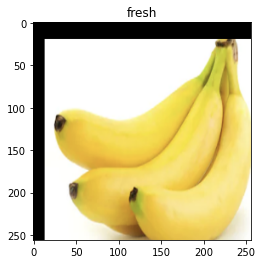

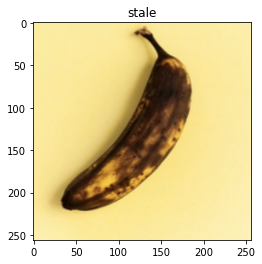

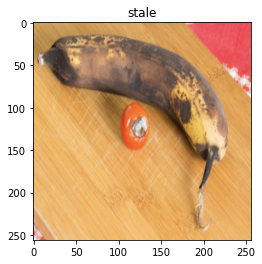

In [135]:
for images, labels in data_test.take(1):
    pred = load_model_1Conv.predict(images)
    for i, r, p in zip(images, labels, pred):
        p = np.round(p[0])
        plt.imshow(i.numpy().astype("uint8"))
        plt.title(class_names[p])
        plt.show()